**Algoritmo k-NN** com os dados da base Iris(Flores Azuis)


***Equipe:***

***Pedro Henrique***

***Rafael Vieira***

***Rodrigo de Moraes***

***Thaís Bandeira***


O objetivo é conseguir classificar uma nova amostra entre uma das 3 possíveis classes de espécies da Iris, baseado no comprimento e largura das sépalas e o comprimento e largura das pétalas das mesmas. O dataset usado aqui é de uma base para treinamento onde possuem 50 amostras de cada uma das 3 classes(Setosa,Versicolor e Virginica). A base já se encontra perfeitamente balanceada e ajustada.

Importando a biblioteca Pandas e a base de dados Iris diretamente do Dataset de SKLearn, sem necessidade de buscar a base e importar a tabela .csv.
Em seguida, imprime logo na tela a tabela.

In [18]:
# Importando pandas
import pandas as pd

# Importando o dataset
from sklearn.datasets import load_iris

# Imprimindo os dados
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Transformando a tabela Iris(armazenada na variável iris) em um dataframe na variável iris_df. Isso não passa os nomes das colunas, por isso, se busca a feature "target" em iris e se atribui em iris_df, passando assim os nomes das colunas da base e em seguida, imprime a base.

In [19]:
# Transformando em um DataFrame
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

# Visualizando a base
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Filtrando a base
Atribuindo a iris1 apenas os dados das espécies 1 e 2 e as colunas de comprimento e largura das pétalas.
E em seguida, imprimindo na tela a mesma contendo os dados filtrados.

In [20]:
# Selecionando apenas as colunas de pétala
iris1 = iris_df.loc[iris_df.target.isin([1,2]), ['petal length (cm)','petal width (cm)', 'target']]
iris1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


Atribuindo a X apenas os valores das colunas de comprimento e largura das pétalas já filtradas em iris1 e aribuindo a y os valores das classificações dessas mesmas.

In [21]:
# Separando X e Y
X = iris1[['petal length (cm)', 'petal width (cm)']]
y = iris1.target

#
X
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

Criando um split de test e train para separar os dados para treino e teste.
Passando os X e y já coletados antes e passando o tamanho da base de testes(Número padrão é 0.33)

In [22]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

O trecho abaixo gera um gráfico com os dados de treino e os dados de teste.

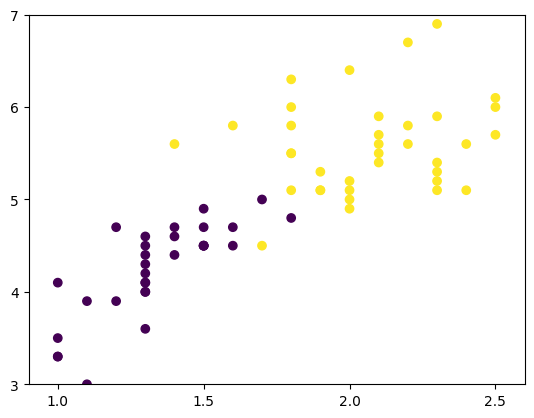

In [23]:
# Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')
ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5], ylim=(3, 7), yticks=[3, 4, 5, 6, 7])
plt.show()

E agora, finalmente, começando a usar o k-NN, começando com a importação do k-NN do SKLearn usando sua função de classificador e chamando-o de clf(classificador). Atribuindo o número de vizinhos de 3 (k = 3, ou n_neighbors).

Fazendo o fit com os dados de treino X_train e y_train no no classificador do k-NN.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X,y)
KNeighborsClassifier(...)


KNeighborsClassifier(n_neighbors=Ellipsis)

In [25]:
# Importando o k-NN
from sklearn.neighbors import KNeighborsClassifier

# Criando o classificador
clf = KNeighborsClassifier(n_neighbors = 3)

# Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

# Fazendo a previsão para os dados de teste
y_pred = clf.predict(X_test)

# Usando a matriz de confusão para fazer a avaliação dos dados previstos
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]])

Analizando a saída da avaliação:
Aqui vemos que o 19, 0 signfica ele acertou 19 vezes quando é prá dar resultado 0 e realmente deu 0
e acertou 8 vezes quando era para dar 1, mas teve 6 valores que ele previu como 0, mas eram 1.

A visualização seria mais ou menos assim:

"0" - "1" Quantitativos

19  -  0 -> Tem que dar 0

6   -  8 -> Tem que dar 1

Usando o mesmo algoritmo novamente, e acrescentando a base de teste para ser exibida juntamente com os de treino para serem exibidos com uma outra cor.

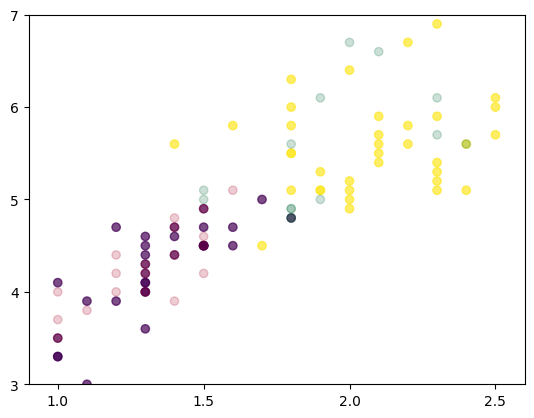

In [27]:
# Visualizando os dados de treino e de teste
fig, ax = plt.subplots()

ax.scatter(x=X_train['petal width (cm)'],
           y=X_train['petal length (cm)'],
           c=y_train, alpha=0.7,
           cmap='viridis')


ax.scatter(x=X_test['petal width (cm)'],
           y=X_test['petal length (cm)'],
           c=y_test, alpha=0.2,
           cmap='RdYlGn')

ax.set(xlim=(0.9, 2.6), xticks=[1, 1.5, 2, 2.5],
       ylim=(3,7), yticks=[3,4,5,6,7])

plt.show()

Buscando os dados onde o y de teste deu diferente do y que foi previsto.

In [28]:
X_test[y_test != y_pred]

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5
